<a href="https://colab.research.google.com/github/ParasHarnagle/NBs/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On examining this dataset , it is a sinosidal  wave thus can take models where continous regression is the case, here trend, seasonality is being repated thus a multivariate ARIMA model or LSTM model would be a good option, along wiht some ensemble algos like xgboost


In [92]:
#dataset scr-dataset.csv

import pandas as pd
import numpy as np
data = pd.read_csv("scr-dataset.csv")

In [82]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       440 non-null    float64
 1   y       440 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [101]:
data.head()

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438


In [84]:
# training on whole dataset as objective is to find y at x = 50
X = data['x']
X.shape

(440,)

In [85]:
#checking 50 exist in dataset
val = (X==50).any().any()
val

False

In [86]:
y = data['y']
y.shape


(440,)

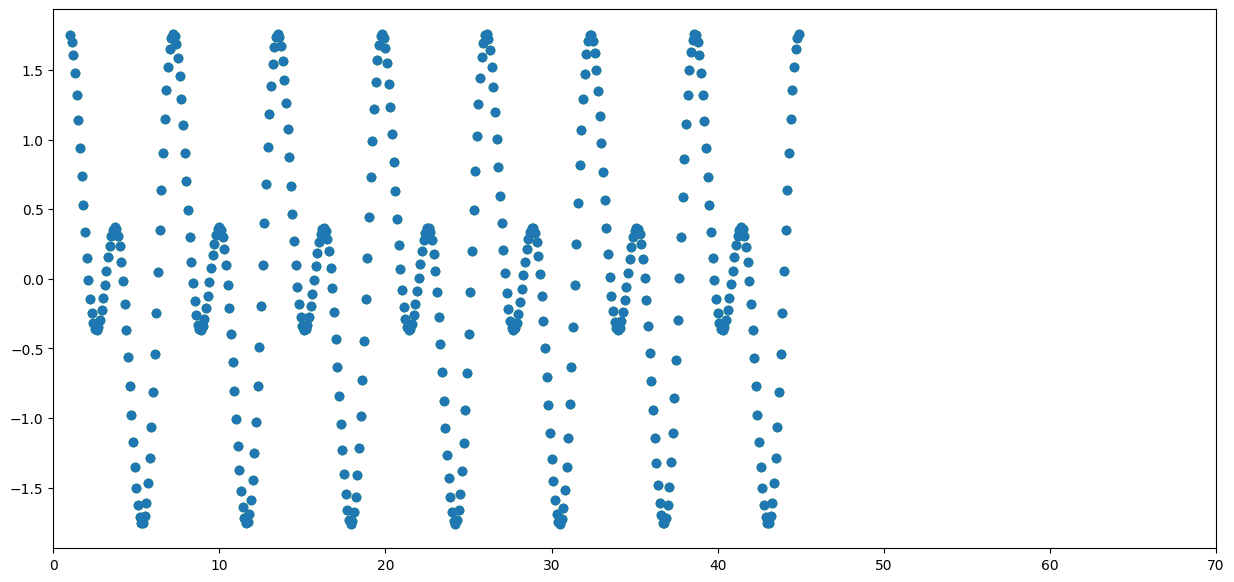

In [165]:
# plotting the data to verify

import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.scatter(X,y,color='green')
plt.scatter(X,y)
plt.show()

In [131]:
def create_dataset(X, y, time_step=10):
    Xs, ys = [], []
    for i in range(len(X)-time_step-1):
        Xs.append(X[i:(i+time_step), 0])
        ys.append(y[i + time_step, 0])
    return np.array(Xs), np.array(ys)

In [156]:
data = pd.read_csv("scr-dataset.csv")
X = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)


from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [157]:
time_step = 10
#X_train, y_train = create_dataset(X, y,time_step)
X_train, y_train = create_dataset(X_scaled, y_scaled, time_step)

In [175]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
import tensorflow as tf

In [185]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences= True, input_shape=(time_step,1)),
    tf.keras.layers.LSTM(50,return_sequences= True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [183]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 6s 17ms/step - loss: 0.1640
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0998
Epoch 3/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0885
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0857
Epoch 5/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0824
Epoch 6/100
14/14 [==============================] - 0s 30ms/step - loss: 0.0814
Epoch 7/100
14/14 [==============================] - 0s 28ms/step - loss: 0.0823
Epoch 8/100
14/14 [==============================] - 0s 27ms/step - loss: 0.0813
Epoch 9/100
14/14 [==============================] - 0s 27ms/step - loss: 0.0805
Epoch 10/100
14/14 [==============================] - 0s 28ms/step - loss: 0.0796
Epoch 11/100
14/14 [==============================] - 0s 28ms/step - loss: 0.0799
Epoch 12/100
14/14 [==============================] - 0s 29ms/step - loss: 0.0804
Epoch 13/100
14/14 [=====

In [184]:
# Predict the value at x = 50
x_val = np.array([[50]])
x_val_scaled = scaler_X.transform(x_val)

x_val_sequence = np.array([X_scaled[-time_step:]]).reshape(1, time_step, 1)

y_pred_scaled = model.predict(x_val_sequence)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
{y_pred[0][0]}

1/1 [==============================] - 2s 2s/step


{-0.067185305}

In [ ]:
#from the dataset the value is near to zero for x=50
# {-0.067185305} value for y
